In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from pyuoi.linear_model import UoI_L1Logistic

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data_path = '/Users/psachdeva/data/cv/EC2_blocks_1_8_9_15_76_89_105_CV_AA_ff_align_window_-0.5_to_0.79_none_AA_avg.h5'

In [3]:
f = h5py.File(data_path, 'r')

In [4]:
X_c = f['Xhigh gamma'][:, :, 75]
X_v = f['Xhigh gamma'][:, :, 175]
cvs = f['y'][:]
y_v = cvs % 3
y_c = np.floor(cvs / 3)

In [5]:
X_v_train, X_v_test, y_v_train, y_v_test = \
    train_test_split(
        X_v, y_v, test_size=0.2, shuffle=True, stratify=y_v
    )

In [6]:
X_c_train, X_c_test, y_c_train, y_c_test = \
    train_test_split(
        X_c, y_c, test_size=0.2, shuffle=True, stratify=y_c
    )

# Vowels

In [7]:
logistic_v = LogisticRegressionCV(
    Cs=50, fit_intercept=True, cv=5, solver='saga',
    penalty='l1', multi_class='multinomial', max_iter=250
)

In [8]:
logistic_v.fit(X_v_train, y_v_train)

LogisticRegressionCV(Cs=50, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=250, multi_class='multinomial', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='saga', tol=0.0001, verbose=0)

In [9]:
print(logistic_v.score(X_v_train, y_v_train))
print(logistic_v.score(X_v_test, y_v_test))
print(np.count_nonzero(logistic_v.coef_) / logistic_v.coef_.size)

0.6456003889158969
0.6038834951456311
0.3449612403100775


In [10]:
uoi_v = UoI_L1Logistic(n_boots_sel=30,
                       n_boots_est=30,
                       fit_intercept=True,
                       standardize=False,
                       selection_frac=0.8,
                       estimation_frac=0.8,
                       n_C=50,
                       multi_class='multinomial',
                       shared_support=False)

In [11]:
uoi_v.fit(X_v_train - X_v_train.mean(axis=0, keepdims=True), y_v_train)

UoI_L1Logistic(comm=None, eps=1e-05, estimation_frac=0.8,
               estimation_score='acc', fit_intercept=True, logger=None,
               max_iter=None, multi_class='multinomial', n_C=50, n_boots_est=30,
               n_boots_sel=30,
               random_state=<module 'numpy.random' from '/Users/psachdeva/anaconda3/lib/python3.6/site-packages/numpy/random/__init__.py'>,
               selection_frac=0.8, shared_support=False,
               stability_selection=1.0, standardize=False, tol=0.001,
               warm_start=None)

In [17]:
print(uoi_v.score(X_v_train - X_v_train.mean(axis=0, keepdims=True), y_v_train))
print(uoi_v.score(X_v_test - X_v_train.mean(axis=0), y_v_test))
print(np.count_nonzero(uoi_v.coef_) / uoi_v.coef_.size)

0.6519202722411278
0.5786407766990291
0.16666666666666666


# Consonants

In [7]:
logistic_c = LogisticRegressionCV(
    Cs=50, fit_intercept=True, cv=5, solver='saga',
    penalty='l1', multi_class='multinomial', max_iter=250
)

In [8]:
logistic_c.fit(X_c_train - X_c_train.mean(axis=0, keepdims=True), y_c_train)

LogisticRegressionCV(Cs=50, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=250, multi_class='multinomial', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='saga', tol=0.0001, verbose=0)

In [9]:
print(logistic_c.score(X_c_train - X_c_train.mean(axis=0, keepdims=True), y_c_train))
print(logistic_c.score(X_c_test - X_c_train.mean(axis=0), y_c_test))
print(np.count_nonzero(logistic_c.coef_) / logistic_c.coef_.size)

0.4312105007292173
0.2621359223300971
0.45348837209302323


In [31]:
uoi_c = UoI_L1Logistic(n_boots_sel=30,
                       n_boots_est=30,
                       fit_intercept=True,
                       standardize=False,
                       selection_frac=0.8,
                       estimation_frac=0.8,
                       estimation_score='acc',
                       n_C=50,
                       multi_class='multinomial',
                       shared_support=False)

In [32]:
uoi_c.fit(X_c_train - X_c_train.mean(axis=0, keepdims=True), y_c_train)

UoI_L1Logistic(comm=None, estimation_frac=0.8, estimation_score='acc',
               fit_intercept=True, max_iter=None, multi_class='multinomial',
               n_C=50, n_boots_est=30, n_boots_sel=30,
               random_state=<module 'numpy.random' from '/Users/psachdeva/anaconda3/lib/python3.6/site-packages/numpy/random/__init__.py'>,
               selection_frac=0.8, shared_support=False,
               stability_selection=1.0, standardize=False, tol=0.001,
               warm_start=None)

In [37]:
print(uoi_c.score(X_c_train - X_c_train.mean(axis=0, keepdims=True), y_c_train))
print(uoi_c.score(X_c_test - X_c_train.mean(axis=0), y_c_test))
print(np.count_nonzero(uoi_c.coef_) / uoi_c.coef_.size)

0.43412736995624696
0.2504854368932039
0.310281517747858


In [24]:
np.max(uoi_c.scores_)

0.3859223300970874

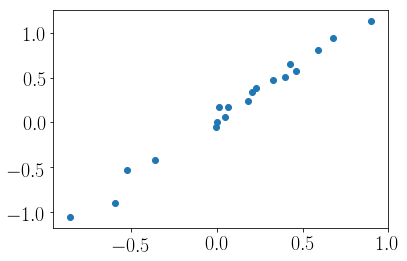

In [43]:
plt.scatter(
    logistic_c.intercept_ - logistic_c.intercept_[0],
    uoi_c.intercept_ - uoi_c.intercept_[0]
)

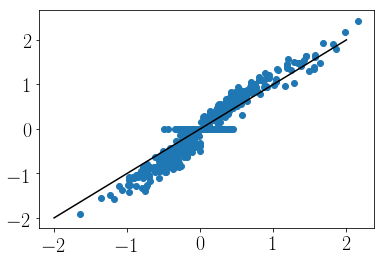

In [47]:
plt.scatter(
    logistic_c.coef_.ravel(),
    uoi_c.coef_.ravel()
)
plt.plot([-2, 2], [-2, 2], color='k')

In [49]:
logistic_c.coef_[0]

array([-3.27079905e-01, -2.29015793e-01,  4.31209481e-01,  1.07556467e-01,
        0.00000000e+00,  1.47665135e-01,  0.00000000e+00,  0.00000000e+00,
        2.17385972e-01, -3.18716619e-01, -5.68633200e-02,  0.00000000e+00,
        0.00000000e+00, -2.34466119e-01,  1.58117888e-02, -3.10449732e-01,
        1.94135060e-03,  3.63378967e-01,  4.14447825e-01,  0.00000000e+00,
        0.00000000e+00, -5.04298946e-01,  0.00000000e+00, -1.70680317e-01,
       -7.56664510e-01,  1.56633553e+00, -4.66745833e-01,  4.53948352e-01,
        2.70305223e-01,  0.00000000e+00,  2.22161769e-01, -3.07518375e-01,
        3.05624621e-01, -6.93956768e-01, -1.04651812e-01, -3.73405731e-02,
       -7.50860114e-02, -1.29762270e-01,  1.41646272e+00,  5.65809986e-01,
       -2.91569794e-01,  1.65609657e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.59164062e-02,  0.00000000e+00,
       -7.01758318e-03,  1.47096953e-01,  7.37011562e-02, -2.38923106e-02,
       -3.63377901e-02,  